<a href="https://colab.research.google.com/github/adgcal/Anjan_collab_R/blob/main/boolean_lacoperon_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

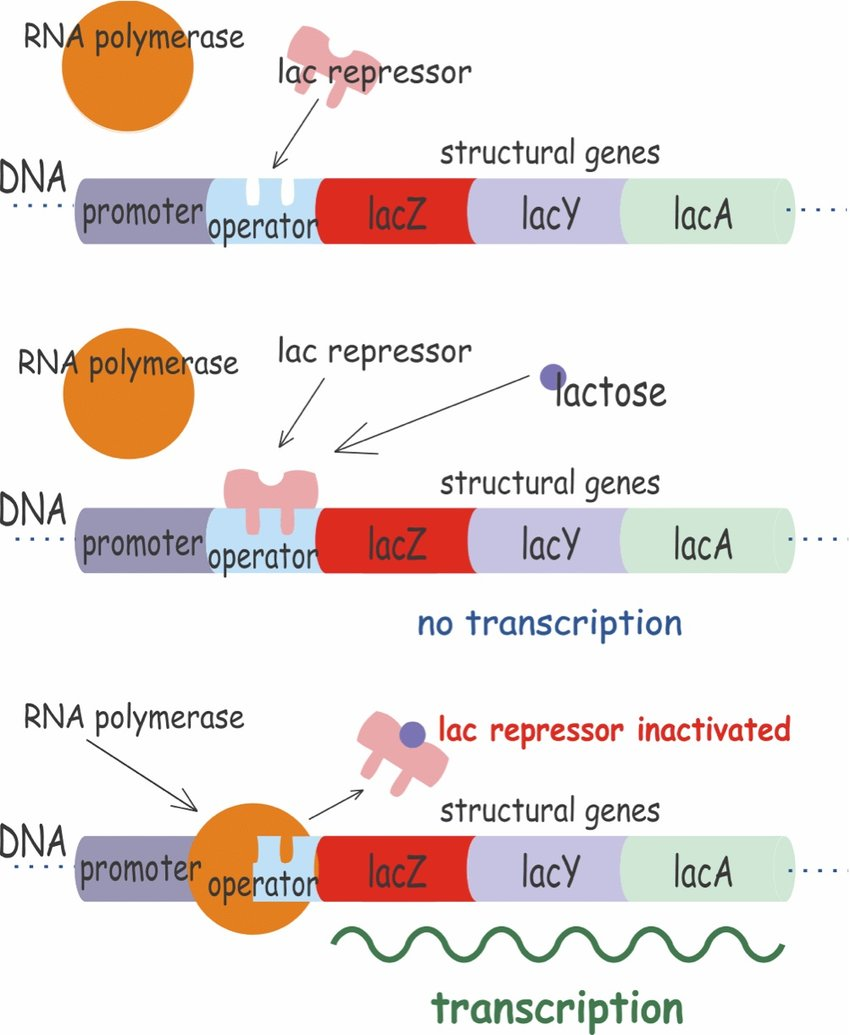

# The logical description of lac operon 

# 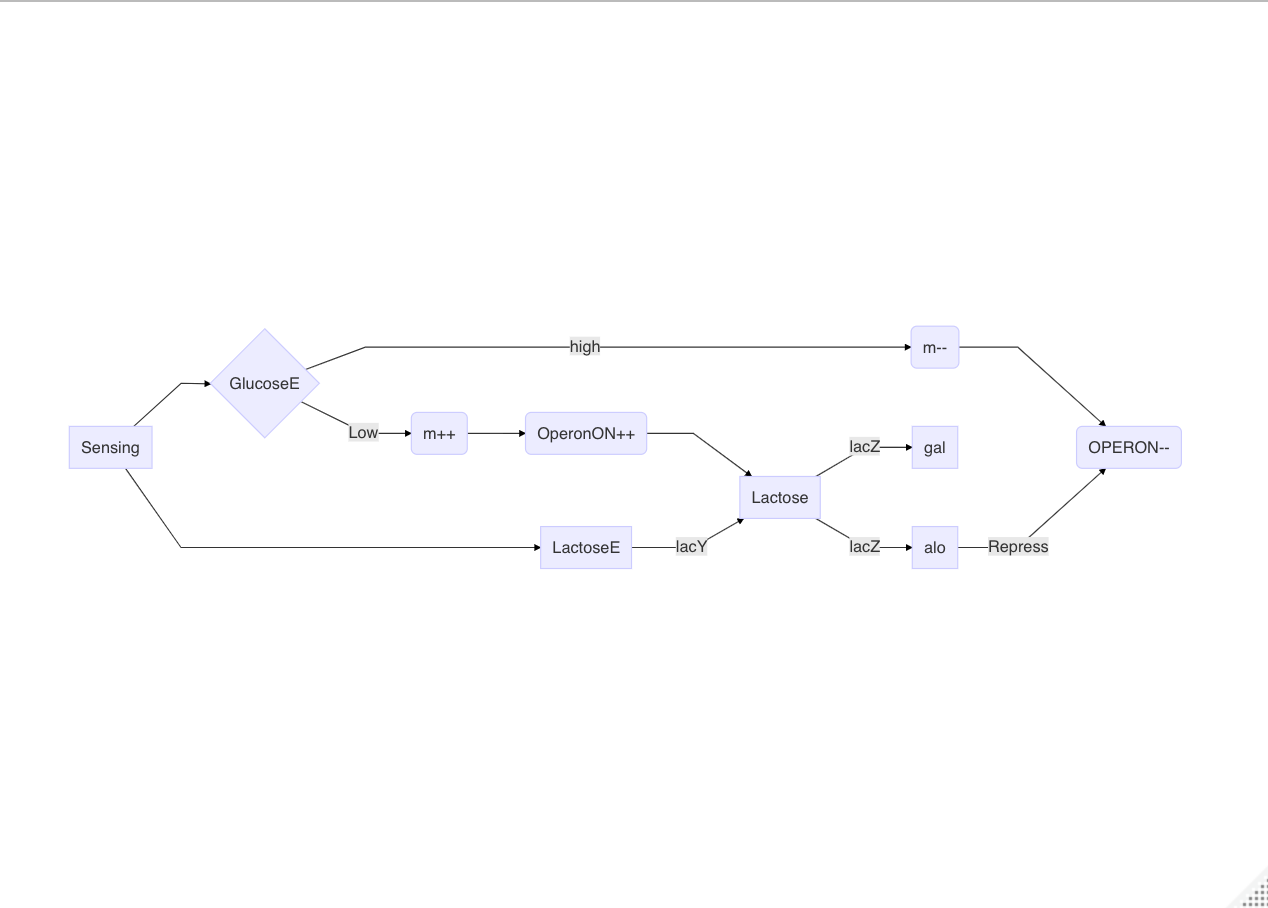

In [ ]:
start_time <- Sys.time()
system.time({
  devtools::install_github("cole-trapnell-lab/leidenbase", upgrade = "never")
  devtools::install_github("lambdamoses/SeuratBasics", upgrade = "never", Ncpus = 2)
})

![](lacoper.png)

In [27]:
install.packages("gtools", repos="https://cran.rstudio.com/")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [28]:
library(gtools)

In [5]:
u<-c(TRUE,FALSE)
s=permutations(n=2,r=3,u,repeats.allowed=T)


The operon is ON when mRNA is being produced (M = 1). When mRNA is present, the production of permease and $\beta$-galactosidase is also turned on. This corresponds to the *fixed point 1*
\begin{equation}
(M, E, L) = (1, 1, 1)
\end{equation}

On the other hand, when mRNA is not made, the operon is OFF. This also means no production of lactose permease, and $\beta$-galactosidase. This corresponds to the *fixed-point state 2:
\begin{equation}
(M, E, L) = (0, 0, 0)
\end{equation}

# Four possible external controls
Let Le and Ge are external lactose and glucose 
\begin{align}
Le = 0,Ge = 0\\
Le = 0,Ge = 1\\
Le = 1,Ge = 0\\
Le = 1,Ge = 1 
\end{align}

In [26]:
library(igraph)

# Boolean assumptions for the Lac Operon 
## The Boolean model is built under the assumptions:
- Transcription and translation require one unit of time.This means that if all necessary conditions for the activation of the molecular mechanism are present at time t, the protein production will be happening in time t + 1; 2)
- Degradation of all mRNA and proteins occurs in one time step
- We assume that the values of L and E will be considered to be 1 when levels of lactose and lacZ polypeptide are measurably higher than the basal level, otherwise they will assume null values.



In [30]:
library(gtools)
x <- c(1,  0)
s=permutations(n=2,r=3,v=x,repeats.allowed=T)
ss=matrix(nrow=8,ncol=1)
for (i in 1:8){
  j<-paste(s[i,],collapse="")
  ss[i]<-j}
# The above stores the master of all Boolean states FOR A TRIPLET STATE MEL
print(ss)


     [,1] 
[1,] "000"
[2,] "001"
[3,] "010"
[4,] "011"
[5,] "100"
[6,] "101"
[7,] "110"
[8,] "111"


# Boolean Equation

What is logical in lac operon is evident from the following Boolean equations:
\begin{align}
f_M(t+1)=\neg Ge(t) \land (L(t)\lor Le(t))\\
f_E(t+1)=M(t)\\
f_L(t + 1) = \neg Ge(t)\land (E(t) \lor Le(t))
\end{align}





In [10]:
gmap<-function(LE,GE,u)
{
# u is a string describing a given state with  states M,E and L (e.g. "100")
# gmap return the logical variable 
# It also returns the string 
u<-strsplit(u,"")
u<-as.numeric(u[[1]])
u<-as.logical(u)
LE<-as.logical(LE)
g<-c(FALSE,FALSE,FALSE)
g[2]=u[1]
g[1]=!GE && (u[3]||LE)
g[3]<-!GE && (u[2]||LE)
h=paste(as.numeric(g),collapse="")
return(h)
}


ftrans<-function(LE,GE,v){
  x1<-v[1]
  x2<-v[2]
  x3<-v[3]
  f1<-!GE && (v[3]||LE)
  f2<- v[1]
  f3<- !GE && (v[2]||LE)
  ff<-c(f1,f2,f3)
 return(as.numeric(ff))
}
s[4,]
w<-ftrans(0,0,s[3,])
#w<-gmap(0,0,ss[3,])
print(w)

[1] 0 1 1

[1] 0 0 1


In [61]:
matform<-function(LE,GE,s){
  A<-matrix(rep(0,64),nrow=8,ncol=8)
GG=""
sss=ss
for (i in 1:8){
  S<-gmap(LE,GE,ss[i])
  k<-which(ss==S)
  A[i,k]<-1
  GG<-c(GG,ss[i],ss[k])
}
rownames(A) <- colnames(A)<-ss
g2 <- graph_from_adjacency_matrix(A, weighted=TRUE)
#plot(g2)
print(g2)

return(A)
  
}

In [62]:
A<-matform(0,0,s)

IGRAPH 4e52d65 DNW- 8 8 -- 
+ attr: name (v/c), weight (e/n)
+ edges from 4e52d65 (vertex names):
[1] 000->000 001->100 010->001 011->101 100->010 101->110 110->011 111->111


In [64]:
g2 <- graph_from_adjacency_matrix(A, weighted=TRUE)
print(g2)

IGRAPH a8858d2 DNW- 8 8 -- 
+ attr: name (v/c), weight (e/n)
+ edges from a8858d2 (vertex names):
[1] 000->000 001->100 010->001 011->101 100->010 101->110 110->011 111->111


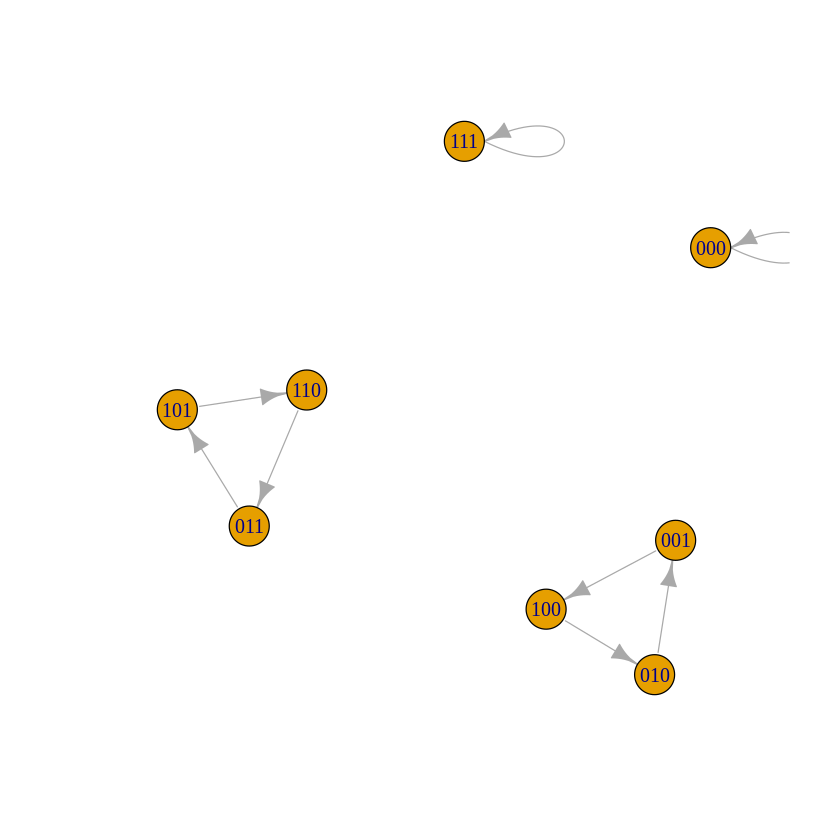

In [65]:
plot(g2)

In [66]:
# Truth Table for LE=0,GE=0
tt=list()
tt<-matrix(nrow=8,ncol=6)
for (i in 1:8){
  tt[i,]<-c(s[i,],ftrans(0,0,s[i,]))
}
knitr::kable(tt)



|   |   |   |   |   |   |
|--:|--:|--:|--:|--:|--:|
|  0|  0|  0|  0|  0|  0|
|  0|  0|  1|  1|  0|  0|
|  0|  1|  0|  0|  0|  1|
|  0|  1|  1|  1|  0|  1|
|  1|  0|  0|  0|  1|  0|
|  1|  0|  1|  1|  1|  0|
|  1|  1|  0|  0|  1|  1|
|  1|  1|  1|  1|  1|  1|

In [67]:
# The  transition for LE=0,GE=0

|  t |  t | t  | t+1  |t+1   | t+1  |
|--:|--:|--:|--:|--:|--:|
|  0|  0|  0|  0|  0|  0|
|  0|  0|  1|  1|  0|  0|
|  0|  1|  0|  0|  0|  1|
|  0|  1|  1|  1|  0|  1|
|  1|  0|  0|  0|  1|  0|
|  1|  0|  1|  1|  1|  0|
|  1|  1|  0|  0|  1|  1|
|  1|  1|  1|  1|  1|  1|

In [81]:
B<-matform(1,0,s)

IGRAPH d9ac079 DNW- 8 8 -- 
+ attr: name (v/c), weight (e/n)
+ edges from d9ac079 (vertex names):
[1] 000->101 001->101 010->101 011->101 100->111 101->111 110->111 111->111


In [82]:
g2 <- graph_from_adjacency_matrix(B, weighted=TRUE)
print(g2)

IGRAPH 7535845 DNW- 8 8 -- 
+ attr: name (v/c), weight (e/n)
+ edges from 7535845 (vertex names):
[1] 000->101 001->101 010->101 011->101 100->111 101->111 110->111 111->111


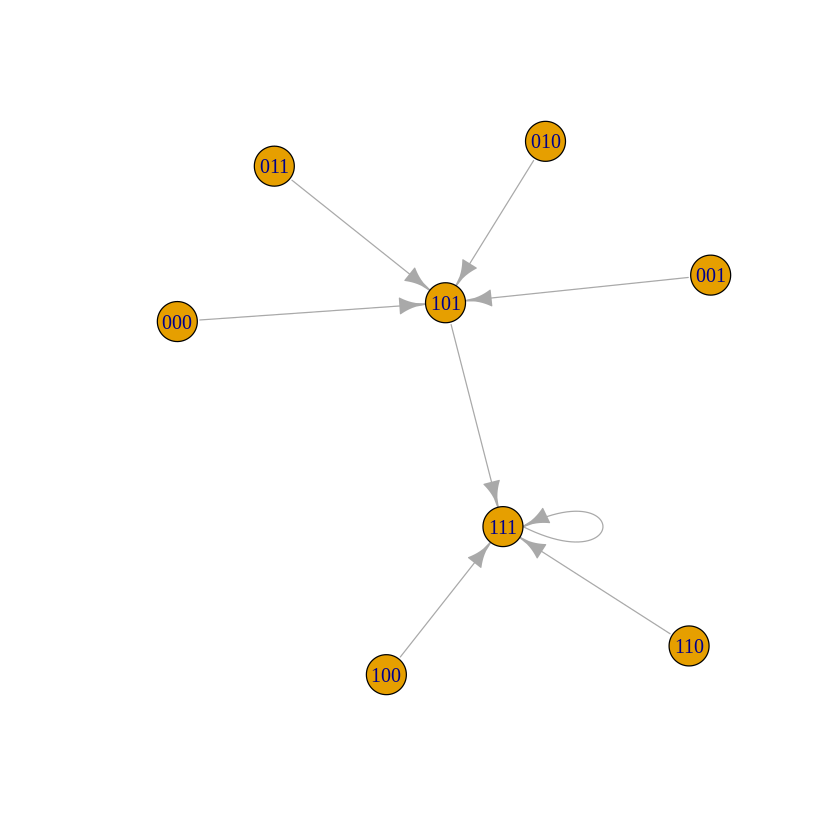

In [83]:
plot(g2)

In [84]:
C<-matform(0,1,s)

IGRAPH d4130a1 DNW- 8 8 -- 
+ attr: name (v/c), weight (e/n)
+ edges from d4130a1 (vertex names):
[1] 000->000 001->000 010->000 011->000 100->010 101->010 110->010 111->010


In [85]:
g2 <- graph_from_adjacency_matrix(C, weighted=TRUE)
print(g2)

IGRAPH f59b020 DNW- 8 8 -- 
+ attr: name (v/c), weight (e/n)
+ edges from f59b020 (vertex names):
[1] 000->000 001->000 010->000 011->000 100->010 101->010 110->010 111->010


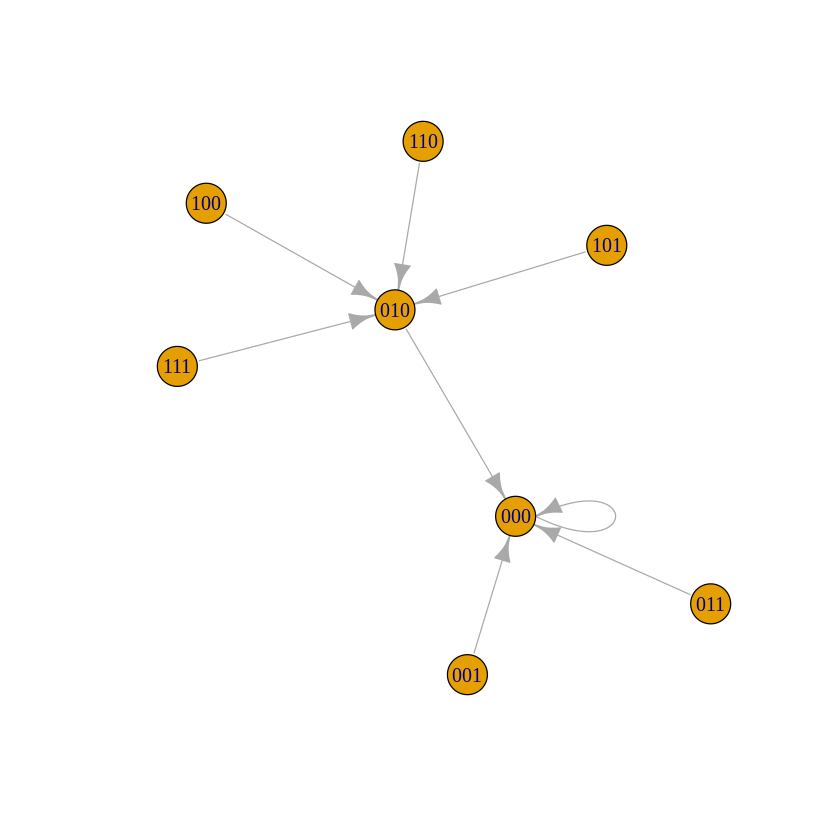

In [86]:
plot(g2)

In [77]:
D<-matform(1,1,s)

IGRAPH f547b66 DNW- 8 8 -- 
+ attr: name (v/c), weight (e/n)
+ edges from f547b66 (vertex names):
[1] 000->000 001->000 010->000 011->000 100->010 101->010 110->010 111->010


In [78]:
g2 <- graph_from_adjacency_matrix(D, weighted=TRUE)
print(g2)

IGRAPH 7a4bda7 DNW- 8 8 -- 
+ attr: name (v/c), weight (e/n)
+ edges from 7a4bda7 (vertex names):
[1] 000->000 001->000 010->000 011->000 100->010 101->010 110->010 111->010


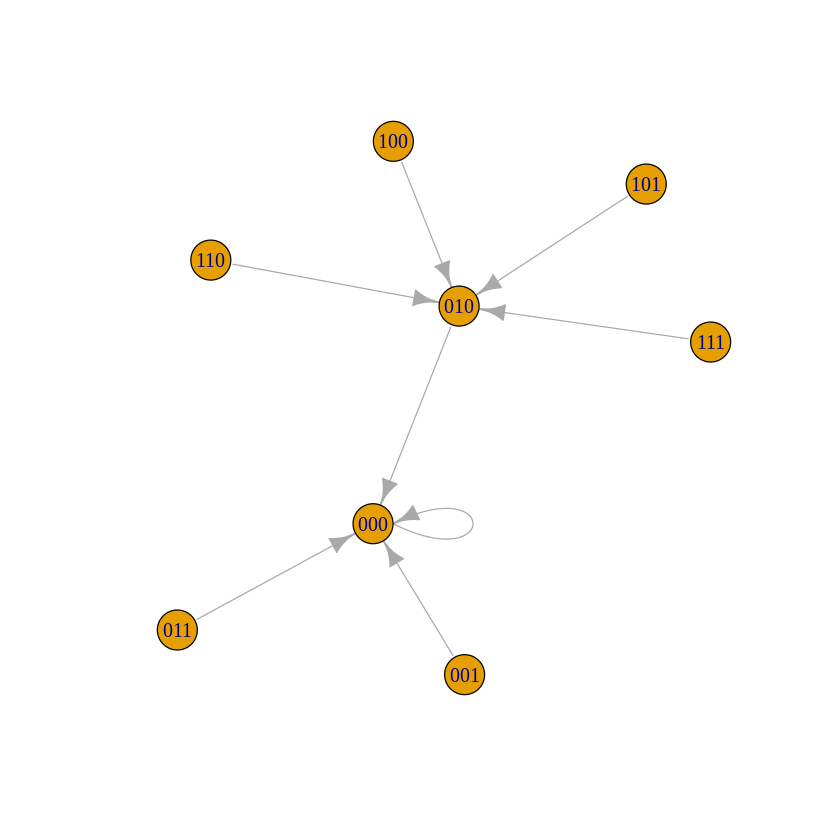

In [79]:
plot(g2)